In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("categories in the 'gender variable' are :",end=" ")
print(df['gender'].unique())

print("categories in the 'race_ethnicity' are :",end=" ")
print(df['race_ethnicity'].unique())

print("categories in the 'parental_level_of_education' are :",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in the 'lunch' are :",end=" ")
print(df['lunch'].unique())

print("categories in the 'test_preparation_course' are :",end=" ")
print(df['test_preparation_course'].unique())



categories in the 'gender variable' are : ['female' 'male']
categories in the 'race_ethnicity' are : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in the 'parental_level_of_education' are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in the 'lunch' are : ['standard' 'free/reduced']
categories in the 'test_preparation_course' are : ['none' 'completed']


In [15]:
##numerical and categorical features
num_features=[feature for feature in df.columns if df[feature].dtype !='O']
cat_features=[feature for feature in df.columns if df[feature].dtype =='O']

print('we have {} numerical features : {}'.format(len(num_features),num_features))
print('we have {} categorical features : {}'.format(len(cat_features),cat_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [33]:
df['totalscore']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['Total_Score']/3

In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score,totalscore,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,229,76.333333


In [35]:
reading_full=df[df['reading_score']==100]['Average_Score'].count()
# reading_full1=df[df['reading_score']==100].shape[0]
writing_full=df[df['writing_score']==100]['Average_Score'].count()
math_full=df[df['math_score']==100]['Average_Score'].count()

print(f'number of students with full marks in reading: {reading_full}')
print(f'number of students with full marks in writing: {writing_full}')
print(f'number of students with full marks in math: {math_full}')

number of students with full marks in reading: 17
number of students with full marks in writing: 14
number of students with full marks in math: 7


In [36]:
reading_full=df[df['reading_score']<=20]['Average_Score'].count()
writing_full=df[df['writing_score']<=20]['Average_Score'].count()
math_full=df[df['math_score']<=20]['Average_Score'].count()

print(f'number of students with less than 20 marks in reading: {reading_full}')
print(f'number of students with less than 20  marks in writing: {writing_full}')
print(f'number of students with less than 20  marks in math: {math_full}')

number of students with less than 20 marks in reading: 1
number of students with less than 20  marks in writing: 3
number of students with less than 20  marks in math: 4


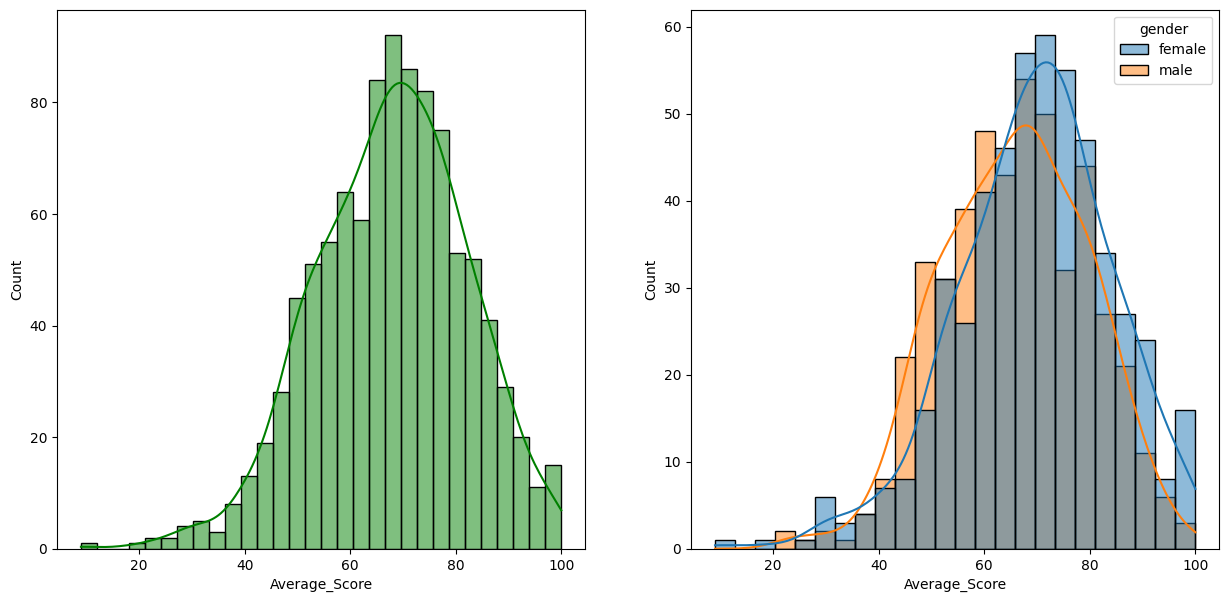

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_Score',kde=True,hue='gender')
plt.show()

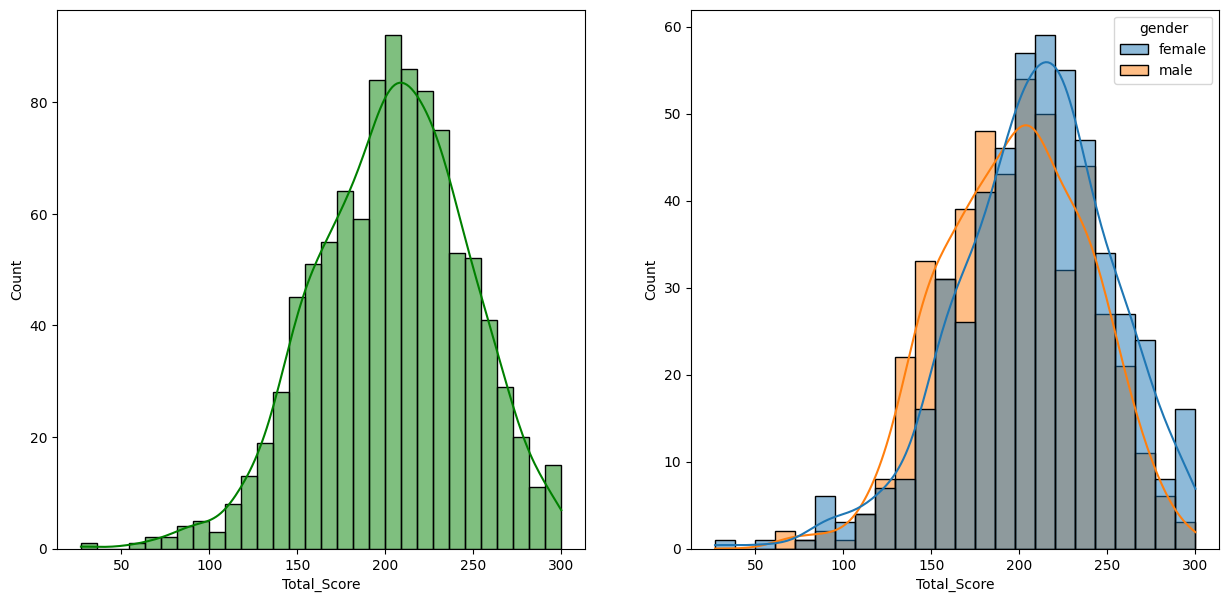

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.show()

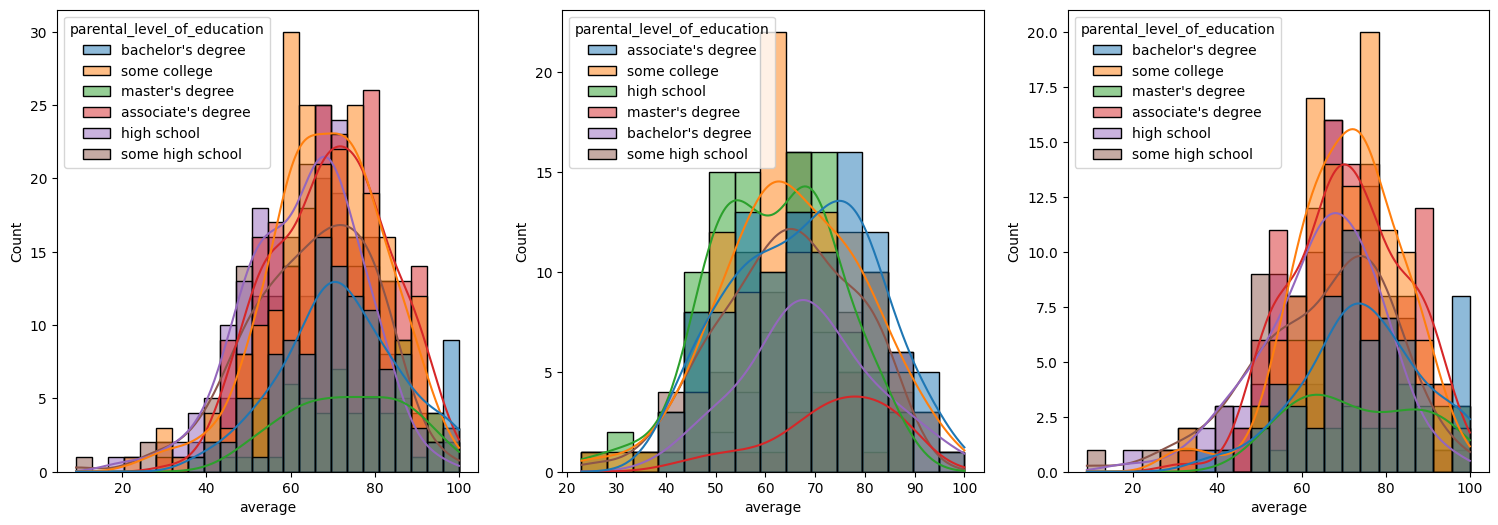

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

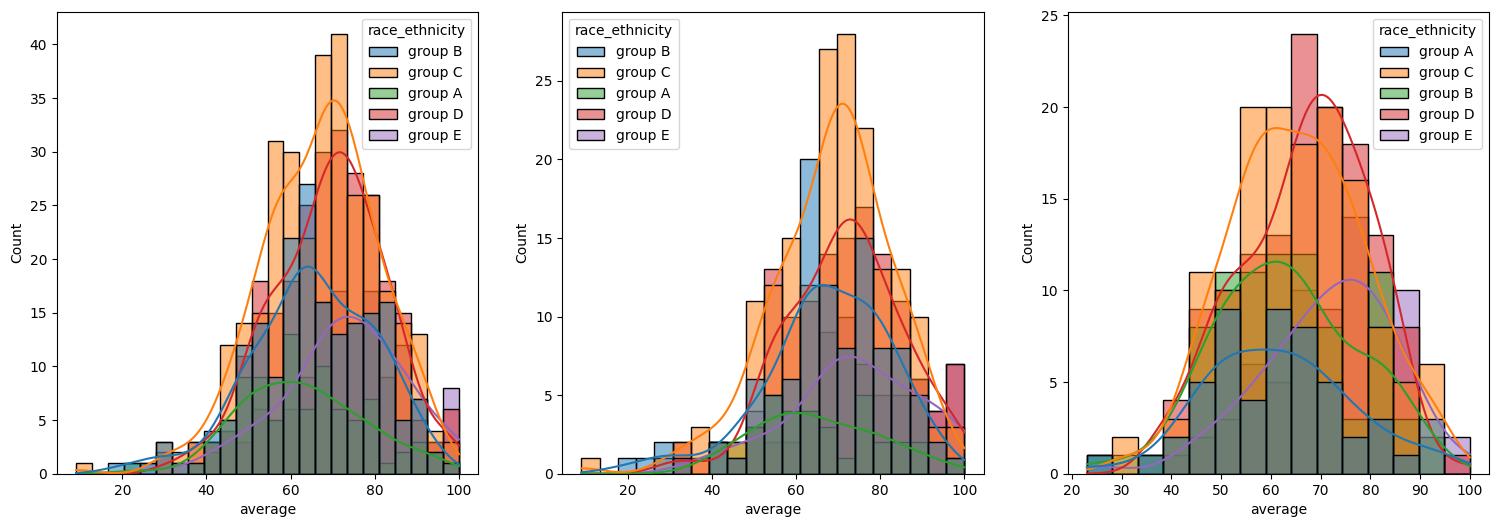

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

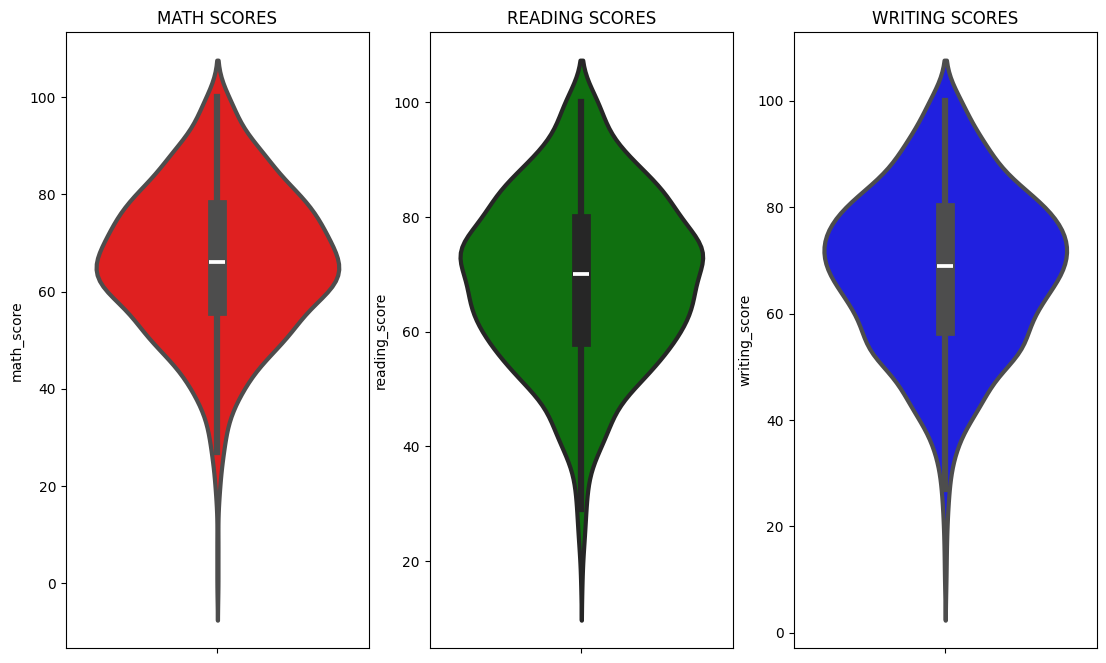

In [47]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

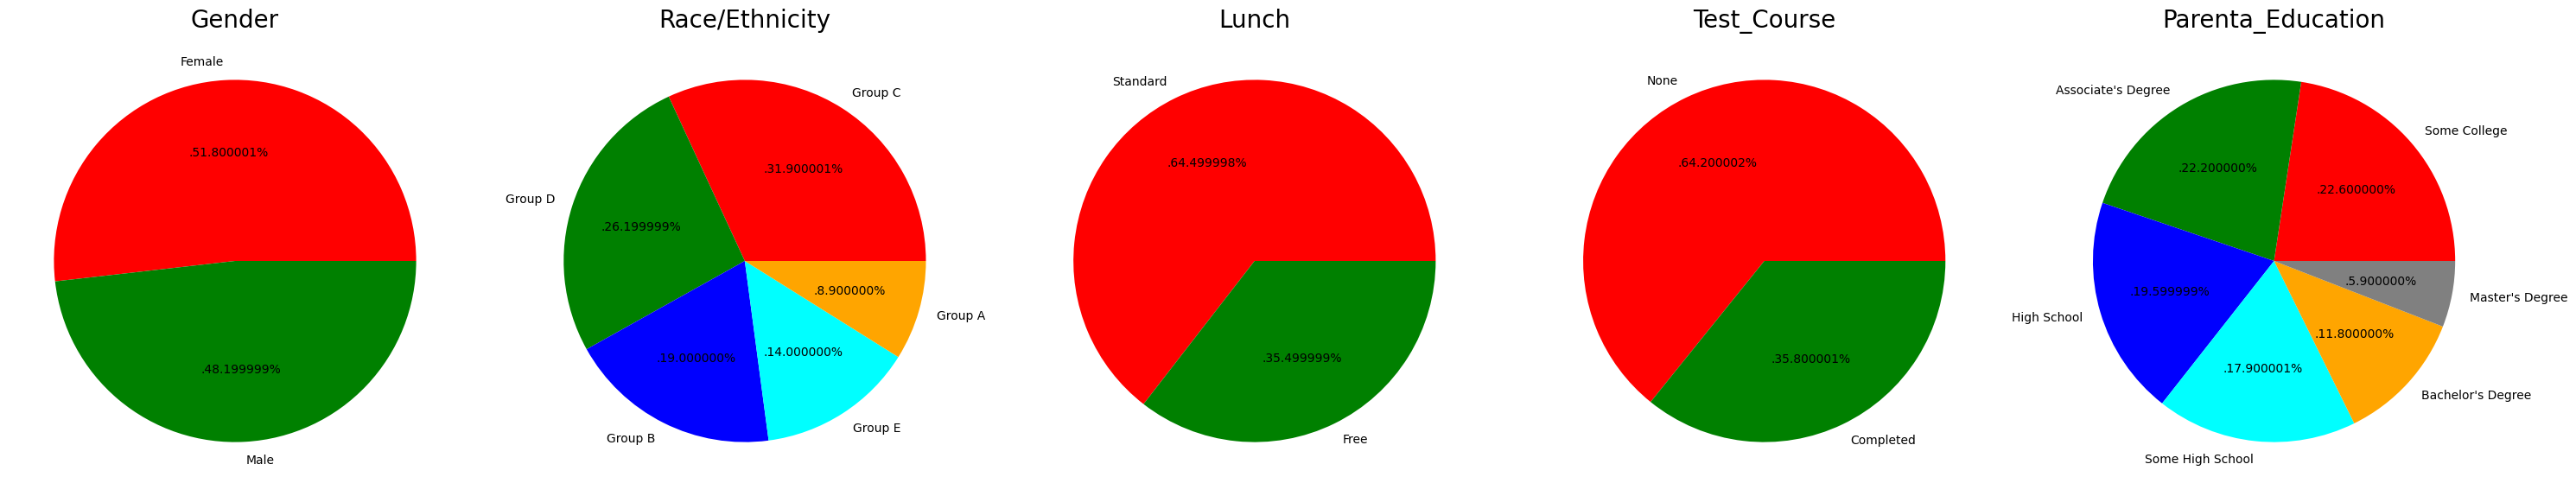

In [48]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parenta_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()